<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_2_4_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.484244,56.996229,21.524205,3748.255033,3872.259710,3139.602186,732.657525
1,0.0,1.0,36.730035,73.860426,46.055021,-42880.297206,-42713.651725,634.908226,-43348.559951
2,0.0,2.0,38.476189,72.442852,81.709269,23253.395947,23456.024258,-3584.555875,27040.580133
3,0.0,3.0,25.072162,92.770991,57.555219,-95406.736327,-95221.337955,-361.944448,-94859.393507
4,0.0,4.0,79.439625,35.760598,23.737412,-3969.153097,-3820.215462,2650.099374,-6470.314836
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.328502,76.512174,67.763648,-13981.902542,-13782.298219,-3590.167256,-10192.130962
119996,999.0,116.0,54.326423,51.972543,68.232775,-7190.349974,-7005.818232,-2554.235979,-4451.582253
119997,999.0,117.0,50.662353,74.513526,48.719772,14613.480156,14797.375807,-3001.956896,17799.332703
119998,999.0,118.0,81.727365,62.216037,63.665720,9190.772765,9408.381887,-3317.091645,12725.473532


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    35.484244  56.996229  ...  3139.602186    732.657525
      1.0    36.730035  73.860426  ...   634.908226 -43348.559951
      2.0    38.476189  72.442852  ... -3584.555875  27040.580133
      3.0    25.072162  92.770991  ...  -361.944448 -94859.393507
      4.0    79.439625  35.760598  ...  2650.099374  -6470.314836
...                ...        ...  ...          ...           ...
999.0 115.0  45.328502  76.512174  ... -3590.167256 -10192.130962
      116.0  54.326423  51.972543  ... -2554.235979  -4451.582253
      117.0  50.662353  74.513526  ... -3001.956896  17799.332703
      118.0  81.727365  62.216037  ... -3317.091645  12725.473532
      119.0  80.521958  57.615758  ... -2066.201623   3483.724911

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    35.484244  56.996229  ...  3139.602186    732.657525
      1.0    36.730035  73.860426  ...   634.908226 -43348.559951
      2.0    38.476189  72.442852  ... -3584.555875  27040.580133
      3.0    25.072162  92.770991  ...  -361.944448 -94859.393507
      4.0    79.439625  35.760598  ...  2650.099374  -6470.314836
...                ...        ...  ...          ...           ...
999.0 115.0  45.328502  76.512174  ... -3590.167256 -10192.130962
      116.0  54.326423  51.972543  ... -2554.235979  -4451.582253
      117.0  50.662353  74.513526  ... -3001.956896  17799.332703
      118.0  81.727365  62.216037  ... -3317.091645  12725.473532
      119.0  80.521958  57.615758  ... -2066.201623   3483.724911

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.484244,56.996229,21.524205,3748.255033,3872.259710,3139.602186,732.657525
1,0.0,1.0,36.730035,73.860426,46.055021,-42880.297206,-42713.651725,634.908226,-43348.559951
2,0.0,2.0,38.476189,72.442852,81.709269,23253.395947,23456.024258,-3584.555875,27040.580133
3,0.0,3.0,25.072162,92.770991,57.555219,-95406.736327,-95221.337955,-361.944448,-94859.393507
4,0.0,4.0,79.439625,35.760598,23.737412,-3969.153097,-3820.215462,2650.099374,-6470.314836
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.328502,76.512174,67.763648,-13981.902542,-13782.298219,-3590.167256,-10192.130962
119996,999.0,116.0,54.326423,51.972543,68.232775,-7190.349974,-7005.818232,-2554.235979,-4451.582253
119997,999.0,117.0,50.662353,74.513526,48.719772,14613.480156,14797.375807,-3001.956896,17799.332703
119998,999.0,118.0,81.727365,62.216037,63.665720,9190.772765,9408.381887,-3317.091645,12725.473532


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    35.484244  56.996229  ...  3139.602186    732.657525
      1.0    36.730035  73.860426  ...   634.908226 -43348.559951
      2.0    38.476189  72.442852  ... -3584.555875  27040.580133
      3.0    25.072162  92.770991  ...  -361.944448 -94859.393507
      4.0    79.439625  35.760598  ...  2650.099374  -6470.314836
...                ...        ...  ...          ...           ...
999.0 115.0  45.328502  76.512174  ... -3590.167256 -10192.130962
      116.0  54.326423  51.972543  ... -2554.235979  -4451.582253
      117.0  50.662353  74.513526  ... -3001.956896  17799.332703
      118.0  81.727365  62.216037  ... -3317.091645  12725.473532
      119.0  80.521958  57.615758  ... -2066.201623   3483.724911

[120000 rows x 7 columns]

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

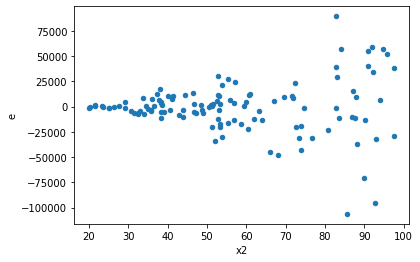

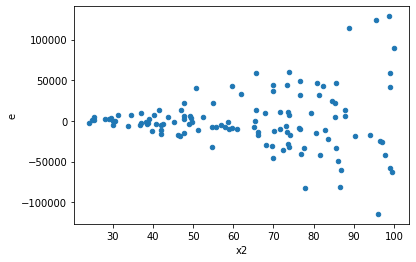

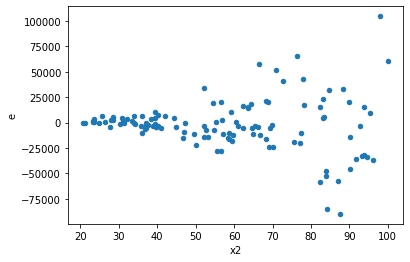

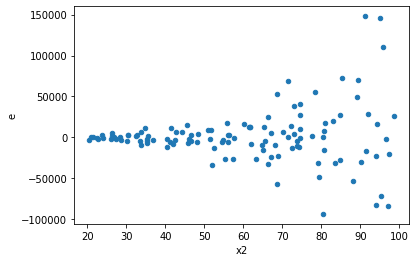

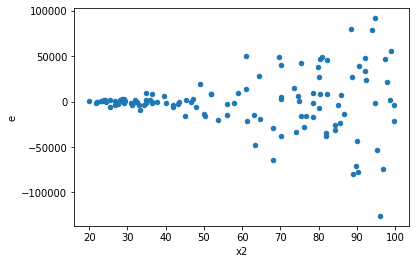

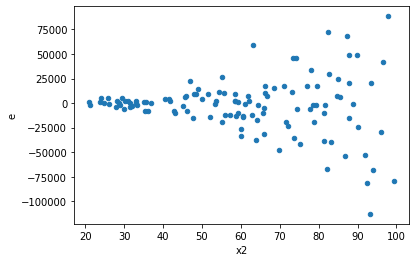

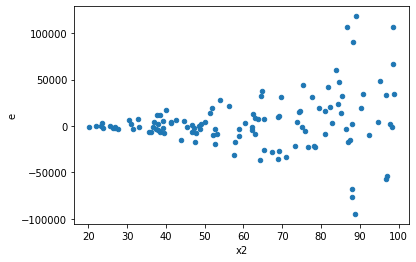

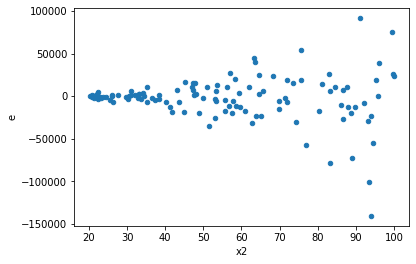

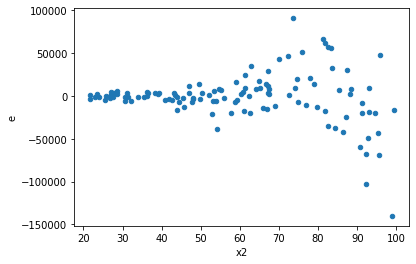

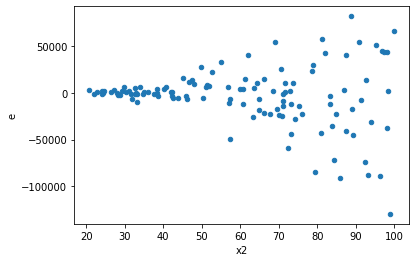

In [12]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,40.0,74.0,10772822991.142723,66935774858.216225,276226230.5421211,916928422.7152908,3.358590404122307,6.860428635357962e-05,0.9999656978568232,Reject005=0 : Heteroscedasticity
2.0,63.0,51.0,33390018001.511627,42785333422.72685,538548677.443736,855706668.454537,1.5828823661092322,0.0832505864324169,0.9583747067837916,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,44242284558.47445,83545842851.37253,850813164.586047,1392430714.189542,1.6407157027814026,0.06719950955067655,0.9664002452246617,Reject005=1 : Homoscedasticity
5.0,57.0,57.0,41861116090.82821,53275978704.46251,747519930.1933609,951356762.5796877,1.2726841441319168,0.365377340631162,0.817311329684419,Reject005=1 : Homoscedasticity
7.0,56.0,58.0,24911219262.20058,59909999031.904976,452931259.3127378,1051052614.5948242,2.3220114755319394,0.001858314527240168,0.9990708427363799,Reject005=0 : Heteroscedasticity
8.0,65.0,49.0,43553877499.92439,40374814010.46203,680529335.9363186,841141958.5512923,1.2297051335708298,0.4324410401092189,0.7837794799453905,Reject005=1 : Homoscedasticity
9.0,48.0,66.0,13411561348.473253,102277591794.62935,285352369.1164522,1573501412.225067,5.54623739851397,7.026724313519139e-09,0.9999999964866378,Reject005=0 : Heteroscedasticity
10.0,65.0,49.0,34707297571.26937,75125496823.23453,542301524.5510839,1565114517.1507194,2.871334799014219,7.985702635582292e-05,0.9999600714868221,Reject005=0 : Heteroscedasticity
12.0,66.0,48.0,4809336676.396591,102489984700.08635,73989795.02148601,2180637972.3422627,29.302113460729107,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,40.0,74.0,10772822991.142723,66935774858.216225,276226230.5421211,916928422.7152908,3.358590404122307,6.860428635357962e-05,Reject005=0 : Heteroscedasticity
1.0,49.0,65.0,90446144941.39122,58665249524.58892,1884294686.2789838,916644523.8217019,0.4889602840142455,0.007115385533491235,Reject005=0 : Heteroscedasticity
2.0,63.0,51.0,33390018001.511627,42785333422.72685,538548677.443736,855706668.454537,1.5828823661092322,0.0832505864324169,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,44242284558.47445,83545842851.37253,850813164.586047,1392430714.189542,1.6407157027814026,0.06719950955067655,Reject005=1 : Homoscedasticity
4.0,59.0,55.0,105302445022.7158,5357079617.538959,1815559396.943376,99205178.1025733,0.05457314316553386,2.6610052849198408e-21,Reject005=0 : Heteroscedasticity
5.0,57.0,57.0,41861116090.82821,53275978704.46251,747519930.1933609,951356762.5796877,1.2726841441319168,0.365377340631162,Reject005=1 : Homoscedasticity
6.0,51.0,63.0,61911008781.36218,26877103194.818405,1238220175.6272438,433501664.4325549,0.3514343473883746,9.534282897006388e-05,Reject005=0 : Heteroscedasticity
7.0,56.0,58.0,24911219262.20058,59909999031.904976,452931259.3127378,1051052614.5948242,2.3220114755319394,0.001858314527240168,Reject005=0 : Heteroscedasticity
8.0,65.0,49.0,43553877499.92439,40374814010.46203,680529335.9363186,841141958.5512923,1.2297051335708298,0.4324410401092189,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    614
Reject005=1 : Homoscedasticity      386
Name: Result_test, dtype: int64